In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

from itertools import product
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

## 19.7 Exercises
### 19.7.1 Forecast the number of air passengers with Prophet

In [3]:
df = pd.read_csv('../data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


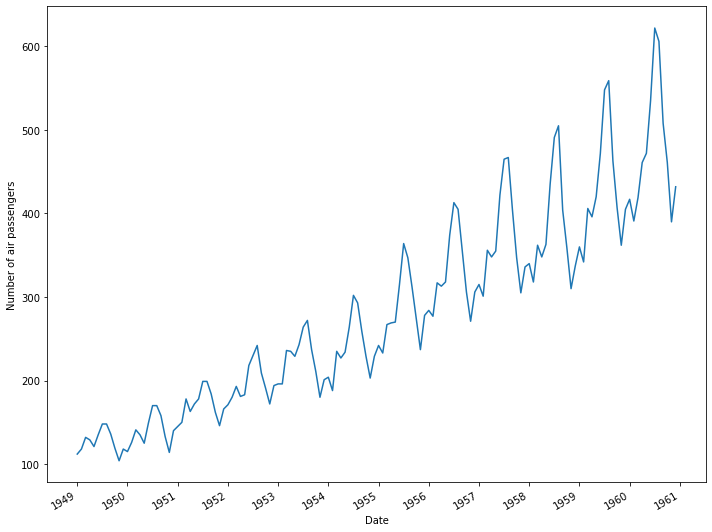

In [4]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [5]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
from pandas.tseries.offsets import MonthEnd

df['ds'] = pd.to_datetime(df['ds']) + MonthEnd(1)

df.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [7]:
train = df[:-12]
test = df[-12:]

In [13]:
train.tail()

,ds,y
127,1959-08-31,559
128,1959-09-30,463
129,1959-10-31,407
130,1959-11-30,362
131,1959-12-31,405


In [30]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

cutoffs = pd.date_range(start='1953-01-31', end='1959-12-31', freq='12M')

for param in params:
    m = Prophet(**param, seasonality_mode='multiplicative')
    m.add_country_holidays(country_name='US')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/7 [00:00<?, ?it/s]

In [31]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}


In [32]:
m = Prophet(**best_params, seasonality_mode='multiplicative')
m.add_country_holidays(country_name='US')
m.fit(train);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=12, freq='M')

In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
132,1960-01-31,404.397214,393.357136,415.090649
133,1960-02-29,390.571581,379.431558,401.271903
134,1960-03-31,449.164853,438.873072,459.448519
135,1960-04-30,437.298317,426.497042,448.948604
136,1960-05-31,442.506752,430.570334,454.170509
137,1960-06-30,517.699745,505.364160,528.885589
138,1960-07-31,572.858204,560.095084,585.199616
139,1960-08-31,576.942027,562.321902,590.393857
140,1960-09-30,498.083683,482.533735,512.678492
141,1960-10-31,433.771574,418.731718,448.895844


In [35]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
132,1960-01-31,417,404.397214,393.357136,415.090649
133,1960-02-29,391,390.571581,379.431558,401.271903
134,1960-03-31,419,449.164853,438.873072,459.448519
135,1960-04-30,461,437.298317,426.497042,448.948604
136,1960-05-31,472,442.506752,430.570334,454.170509


In [12]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mape_prophet = mape(test['y'], test['yhat'])

print(mape_prophet)

4.2789723659307946


Recall that we obtained a MAPE of 2.85% using a SARIMA model in chapter 8. Therefore, Prophet does not outperform the SARIMA model in this case, since it achieves a MAPE of 4.28%.

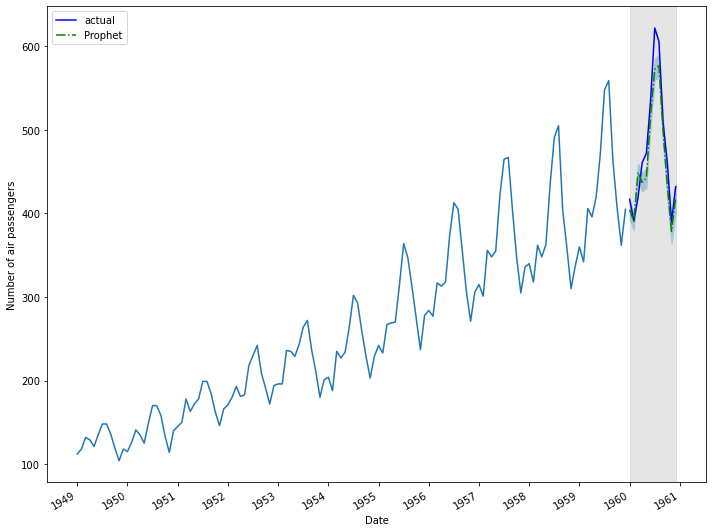

In [38]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='actual')
ax.plot(test['yhat'], 'g-.', label='Prophet')

ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')

fig.autofmt_xdate()
plt.tight_layout()

### 19.7.3 Forecast the monthly volume of anti-diabetic drug prescriptions 

In [3]:
df = pd.read_csv('../data/AusAntidiabeticDrug.csv')
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


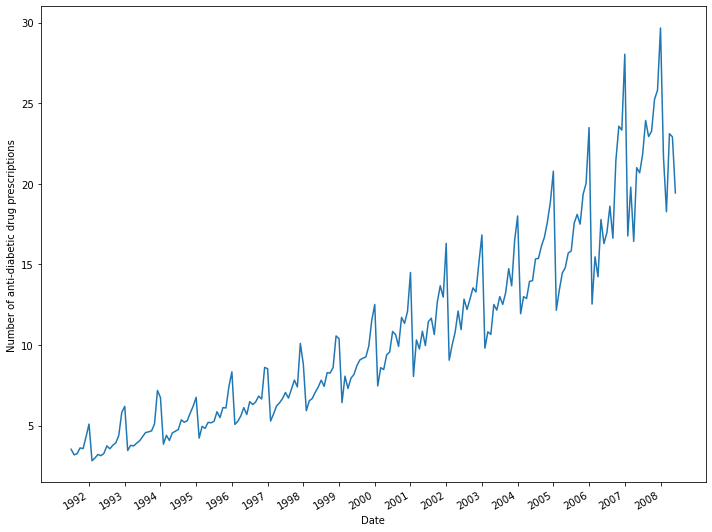

In [4]:
fig, ax = plt.subplots()

ax.plot(df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [5]:
train = df[:-36]
test = df[-36:]

In [6]:
train.tail()

,ds,y
163,2005-02-01,12.154552
164,2005-03-01,13.402392
165,2005-04-01,14.459239
166,2005-05-01,14.795102
167,2005-06-01,15.705248


In [7]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

cutoffs = pd.date_range(start='1995-01-01', end='2005-06-01', freq='12MS')

for param in params:
    m = Prophet(**param, seasonality_mode='multiplicative')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/11 [00:00<?, ?it/s]

In [8]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}


In [9]:
m = Prophet(**best_params, seasonality_mode='multiplicative')
m.fit(train);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=36, freq='MS')

In [11]:
forecast = m.predict(future)
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]

test.head()

,ds,y,yhat,yhat_lower,yhat_upper
168,2005-07-01,15.829550,16.056114,15.466568,16.626953
169,2005-08-01,17.554701,15.858365,15.269826,16.446616
170,2005-09-01,18.100864,16.119738,15.570238,16.718075
171,2005-10-01,17.496668,17.355303,16.756575,17.976872
172,2005-11-01,19.347265,17.521027,16.929232,18.143727


In [13]:
mape_prophet = mape(test['y'], test['yhat'])

print(mape_prophet)

12.142130307890492


In chapter 11, we built a SARIMA model that achieved a MAPE of 7.9%. Using Prophet, we achieved a MAPE of 12.1%. Therefore, Prophet does not outperform SARIMA in this case.

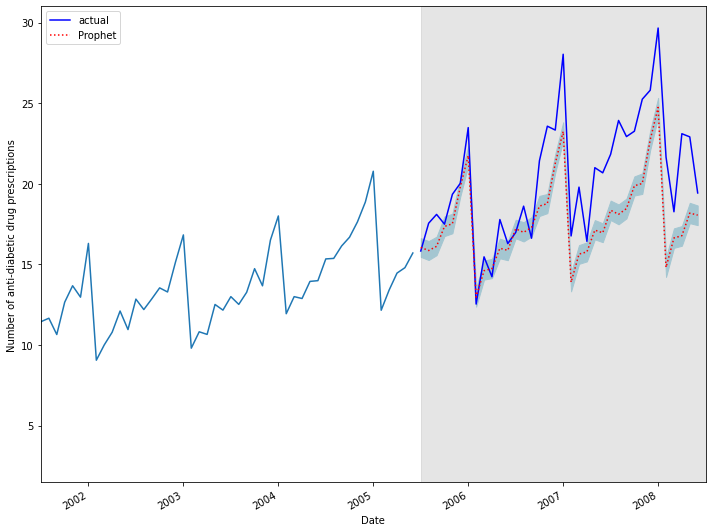

In [14]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='actual')
ax.plot(test['yhat'], 'r:', label='Prophet')

ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')
ax.axvspan(168, 204, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(120, 204)

fig.autofmt_xdate()
plt.tight_layout()